# Autoregressive Models
Autoregressive model are similar to linear regression. In linear regression we have 2 independent variables $x$, $y$. In autoregressive model we use only 1 variable $y$ with its own shifted-in-time values (lag).

Asume we have $y_1, y_2, \dots, y_n$ which represents the values in time $1, 2, \dots, n$.

As mentioned, in autoregressive model, we use the same $y$ values with a delay or lag instead of time ($x$) values.  

Therefore, the line formula is shown as below:
\begin{equation*}
\large
y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}
\end{equation*}

The above formula shows the relation of time series data with its own lagged values with order 1 which is represented as $AR(1)$ (first-order autoregression).

\begin{equation*}
\large
AR(1) = y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}
\end{equation*}

This model is a second-order autoregression, written as $AR(2)$, since the value at time $t$ is predicted from the values at times $t−1$ and $t−2$. More generally, a $kth-order$ autoregression, written as $AR(k)$, is a multiple linear regression in which the value of the series at any time $t$ is a (linear) function of the values at times $t−1,t−2,\dots ,t−k$.


# Loading Libraries and Initialize

In [1]:
%%capture
%run -i 1-ReadingData.ipynb

# Calculating Simple Linear Regression

In [2]:
df['close-1'] = df['close'].shift(-1)

df = df[1:]
x = df['close-1']
y = df['close']
cov = pd.DataFrame({'x': x, 'y': y}).cov()
print('Covariance Result')
print('------------------------------')
print(cov)
b1 = cov['x']['y'] / x.var()
b0 = y.mean() - b1 * x.mean()
print('------------------------------')
print('b0 (Intersection)',b0)
print('b1 (Slope)', b1)
df['arm'] = b0 + b1 * df['close-1']

Covariance Result
------------------------------
            x           y
x  932.542765  930.942542
y  930.942542  933.109272
------------------------------
b0 (Intersection) 0.1550178364389012
b1 (Slope) 0.9982840213295548


# Visualizing All Data

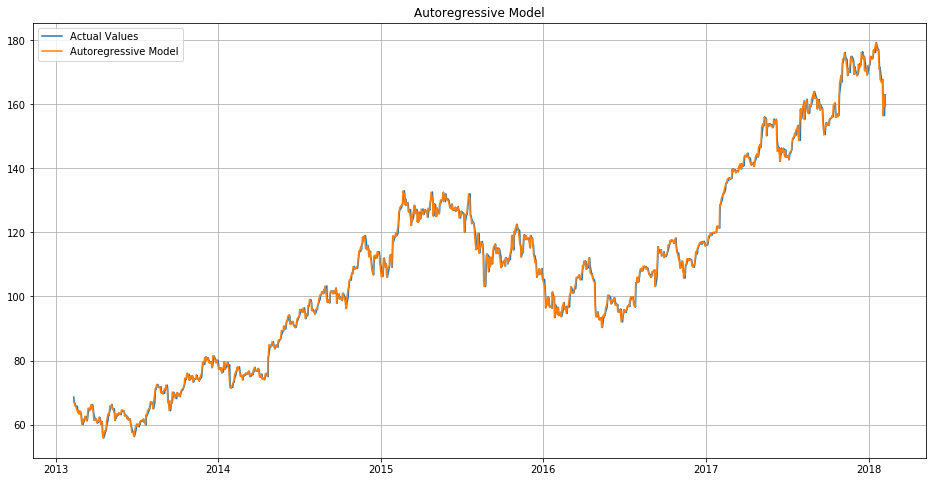

In [3]:
plt.figure(figsize=(16,8))
plt.title('Autoregressive Model')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['arm'], label='Autoregressive Model')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

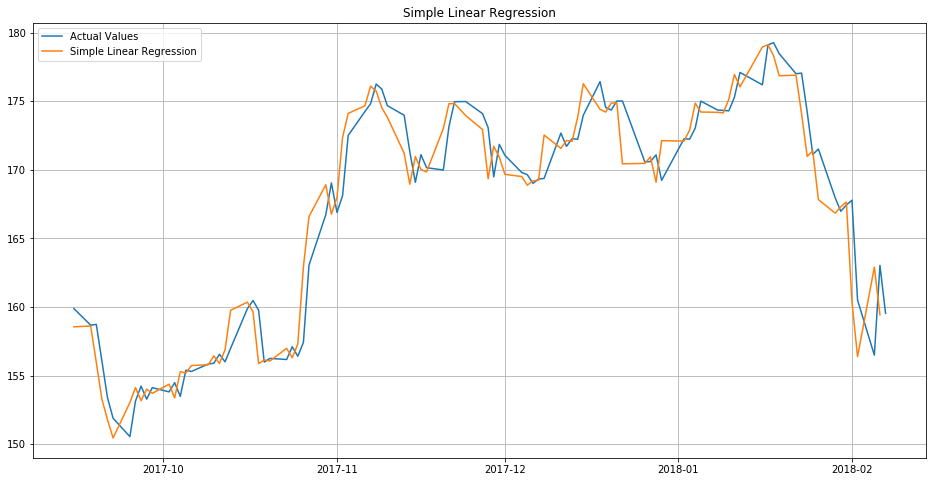

In [4]:
df1 = df[-100:]

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(df1['close'], label='Actual Values')
plt.plot(df1['arm'], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()